In [39]:
import mplfinance as mpl
import matplotlib.pyplot as plt
import pandas_datareader as pd
import datetime
from email.mime.multipart import MIMEMultipart
import smtplib
import ssl
from email.mime.text import MIMEText

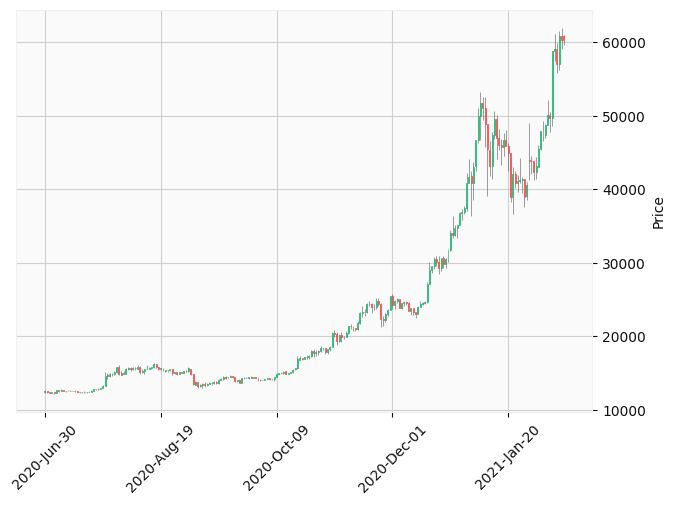

In [48]:

smtp_server='smtp.live.com'
port=587
sender_mail='sender_mail'
sender_pass='sender\'s password'
receiver_mail='receiver_mail'
context=ssl.create_default_context()
#asparagus_cid = make_msgid()
message = MIMEMultipart('alternative')
message["Subject"] = "Bitcoin raise"
message["From"] = sender_mail
message["To"] = receiver_mail


crypto='BTC'
currency={
    'USA':'USD','Europe':'EUR','Japan':'JPY','UK':'GBP','Australia':'AUD',
    'Canada':'CAD','Russia':'RUB'
    }

start =datetime.datetime(2020,7,1)
end=datetime.datetime.now()

data=pd.DataReader(f"{crypto}-{currency['Canada']}",'yahoo',start,end)
if data['Adj Close'][-1] > data['Adj Close'][-2]:
  body=f"Hi Idriss,\n\n\
  This was sent to you to let you know that today the BTC is raising!\
  Today is {data['Adj Close'][-1]} and yesterday was {data['Adj Close'][-2]}!\n\n\
  Happy trading!"
  text=MIMEText(body,'plain')
  message.attach(text)
  with smtplib.SMTP(smtp_server,port) as server:
    server.ehlo()
    server.starttls(context=context)
    server.ehlo()
    server.login(sender_mail,sender_pass)
    server.sendmail(sender_mail,receiver_mail,message.as_string())  
mpl.plot(data,type='candle',style='yahoo') #type: 'pnf','ohlc','candle','line','renko'